In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('final_df.csv')
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,5,male,58.0,USA,25.80,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,male,68.0,USA,28.75,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,5,female,59.0,USA,23.66,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,5,female,56.0,USA,43.85,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = df[(df['Condition'] != 2) & (df['Condition'] != 3) & (df['Condition'] != 4) & (df['Condition'] != 5) & 
        (df['Condition'] != 6) & (df['Condition'] != 7) & (df['Condition'] != 8)]

In [5]:
df['Condition'].unique()

array([0, 1])

In [6]:
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,USA,23.71,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,0,male,69.0,USA,25.11,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1592,0,male,73.0,USA,24.13,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0,female,32.0,USA,29.05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df[df['Condition'] == 1]

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
164,1,male,61.0,Finland,0.0,0.012297,0.227848,0.0,0.012658,0.033273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,1,male,53.0,Finland,0.0,0.012663,0.293938,0.0,0.000000,0.051803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,1,male,66.0,Finland,0.0,0.018452,0.420100,0.0,0.033321,0.013257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,1,male,63.0,Finland,0.0,0.004679,0.334154,0.0,0.009850,0.041862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,1,male,72.0,Finland,0.0,0.011071,0.676675,0.0,0.001877,0.067180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1,female,54.0,Finland,0.0,0.006816,0.145962,0.0,0.010545,0.007459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,1,female,64.0,Finland,0.0,0.005592,0.200097,0.0,0.019207,0.008753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,1,female,54.0,Finland,0.0,0.009119,0.228930,0.0,0.040066,0.052777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,1,female,62.0,Finland,0.0,0.017355,0.436792,0.0,0.030508,0.046767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df = df.drop(['Country', 'BMI'], axis=1)

In [9]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = df.loc[:, (df != 0).any(axis=0)]

In [11]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
0,0,male,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [12]:
df = df[df['Age'] >= 1]

In [13]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0,male,34.0,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [14]:
park = df[df['Condition'] == 1]
park

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
164,1,male,61.0,0.012297,0.227848,0.0,0.012658,0.033273,0.011573,0.0,...,0.041230,0.133454,0.175045,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
165,1,male,53.0,0.012663,0.293938,0.0,0.000000,0.051803,0.016500,0.0,...,0.090560,0.101688,0.112433,0.021489,0.000000,0.0,0.0,0.0,0.0,0.0
166,1,male,66.0,0.018452,0.420100,0.0,0.033321,0.013257,0.028484,0.0,...,0.023110,0.076138,0.144393,0.030992,0.000000,0.0,0.0,0.0,0.0,0.0
167,1,male,63.0,0.004679,0.334154,0.0,0.009850,0.041862,0.008126,0.0,...,0.150209,0.074120,0.102684,0.060822,0.000000,0.0,0.0,0.0,0.0,0.0
168,1,male,72.0,0.011071,0.676675,0.0,0.001877,0.067180,0.003941,0.0,...,0.011071,0.027210,0.025145,0.025521,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1,female,54.0,0.006816,0.145962,0.0,0.010545,0.007459,0.020448,0.0,...,0.011060,0.104552,0.270447,0.008102,0.000000,0.0,0.0,0.0,0.0,0.0
234,1,female,64.0,0.005592,0.200097,0.0,0.019207,0.008753,0.012886,0.0,...,0.027231,0.081692,0.342573,0.019451,0.001459,0.0,0.0,0.0,0.0,0.0
235,1,female,54.0,0.009119,0.228930,0.0,0.040066,0.052777,0.024592,0.0,...,0.034540,0.040895,0.131528,0.026250,0.004421,0.0,0.0,0.0,0.0,0.0
236,1,female,62.0,0.017355,0.436792,0.0,0.030508,0.046767,0.021922,0.0,...,0.107965,0.067592,0.084034,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


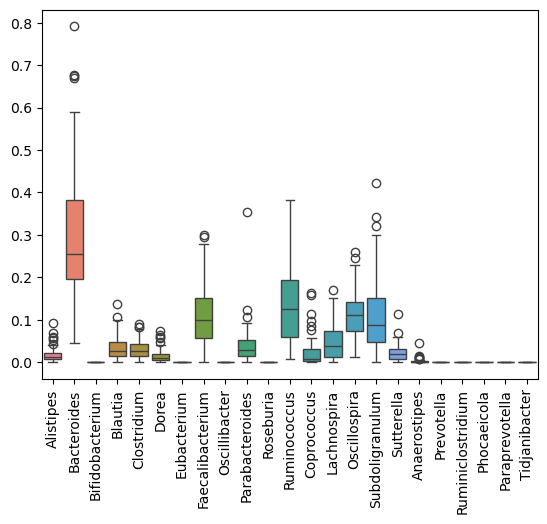

In [15]:
park = park.drop(['Condition', 'Age', 'Sex'], axis=1)
sns.boxplot(park)
plt.xticks(rotation=90)
plt.show()

In [16]:
park['Bifidobacterium'].sum()

0.0

In [17]:
y = df['Condition']

In [18]:
df = df.drop(['Condition', 'Sex', 'Age'], axis=1)

In [19]:
df

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
1,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,0.022425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,0.003892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,0.060624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,0.044716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,0.119143,0.083749,0.052343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1590,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [20]:
numeric_cols = df.select_dtypes(include='number').columns 
df[numeric_cols] = df[numeric_cols].apply(lambda col: np.where(col > 0, col.name, 0))
df

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
5,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,0,0,Blautia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1590,0,Bacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1592,0,0,0,0,0,0,0,0,Oscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1598,0,0,0,0,0,0,0,0,0,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.columns = range(1, len(df.columns) + 1)

In [22]:
df.reset_index(drop=True)

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,Blautia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,Bacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,0,0,0,0,0,0,0,0,Oscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
264,0,0,0,0,0,0,0,0,0,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.replace("0", pd.NA, inplace=True)
df = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

In [24]:
df = pd.DataFrame(df)
df.fillna('').replace('None', '', inplace=True)

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,None,None
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,None,None
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,None,None
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,None,None
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Blautia,Roseburia,None,None,None,None,None,None,None,None,None,None,None,None
262,Bacteroides,None,None,None,None,None,None,None,None,None,None,None,None,None
263,Oscillibacter,None,None,None,None,None,None,None,None,None,None,None,None,None
264,Parabacteroides,None,None,None,None,None,None,None,None,None,None,None,None,None


In [26]:
df.fillna(0, inplace=True)

In [27]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,0,0
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,0,0
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,0,0
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,0,0
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Blautia,Roseburia,0,0,0,0,0,0,0,0,0,0,0,0
262,Bacteroides,0,0,0,0,0,0,0,0,0,0,0,0,0
263,Oscillibacter,0,0,0,0,0,0,0,0,0,0,0,0,0
264,Parabacteroides,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{0, 'Alistipes', 'Sutterella', 'Phocaeicola', 'Faecalibacterium', 'Lachnospira', 'Ruminiclostridium', 'Blautia', 'Coprococcus', 'Roseburia', 'Oscillibacter', 'Paraprevotella', 'Tidjanibacter', 'Dorea', 'Eubacterium', 'Bifidobacterium', 'Bacteroides', 'Clostridium', 'Prevotella', 'Oscillospira', 'Ruminococcus', 'Parabacteroides', 'Anaerostipes', 'Subdoligranulum'}


In [29]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

# ohe -> One-Hot-Encoded
ohe_df = pd.DataFrame(encoded_vals).drop(columns=0)
ohe_df


,Prevotella,Lachnospira,Ruminiclostridium,Coprococcus,Oscillospira,Tidjanibacter,Sutterella,Paraprevotella,Phocaeicola,Anaerostipes,...,Eubacterium,Alistipes,Roseburia,Bifidobacterium,Oscillibacter,Ruminococcus,Parabacteroides,Bacteroides,Clostridium,Dorea
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
X = ohe_df
X

,Prevotella,Lachnospira,Ruminiclostridium,Coprococcus,Oscillospira,Tidjanibacter,Sutterella,Paraprevotella,Phocaeicola,Anaerostipes,...,Eubacterium,Alistipes,Roseburia,Bifidobacterium,Oscillibacter,Ruminococcus,Parabacteroides,Bacteroides,Clostridium,Dorea
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
X.dtypes

Prevotella           int64
Lachnospira          int64
Ruminiclostridium    int64
Coprococcus          int64
Oscillospira         int64
Tidjanibacter        int64
Sutterella           int64
Paraprevotella       int64
Phocaeicola          int64
Anaerostipes         int64
Subdoligranulum      int64
Faecalibacterium     int64
Blautia              int64
Eubacterium          int64
Alistipes            int64
Roseburia            int64
Bifidobacterium      int64
Oscillibacter        int64
Ruminococcus         int64
Parabacteroides      int64
Bacteroides          int64
Clostridium          int64
Dorea                int64
dtype: object

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [33]:
X_train.columns

Index(['Prevotella', 'Lachnospira', 'Ruminiclostridium', 'Coprococcus',
       'Oscillospira', 'Tidjanibacter', 'Sutterella', 'Paraprevotella',
       'Phocaeicola', 'Anaerostipes', 'Subdoligranulum', 'Faecalibacterium',
       'Blautia', 'Eubacterium', 'Alistipes', 'Roseburia', 'Bifidobacterium',
       'Oscillibacter', 'Ruminococcus', 'Parabacteroides', 'Bacteroides',
       'Clostridium', 'Dorea'],
      dtype='object')

In [34]:
smote = SMOTE()

In [37]:
X_train_over_smote, y_train_over_smote = smote.fit_resample(X_train, y_train)

In [52]:
ros = RandomOverSampler()

In [53]:
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

## Multinomial NB

In [54]:
model = MultinomialNB()

In [55]:
model.fit(X_train_over, y_train_over)

MultinomialNB()

In [56]:
y_pred = model.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

1.0

In [58]:
y_prob = model.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob[1]

array([9.99999998e-01, 2.03632079e-09])

In [43]:
y_test_array = np.array(y_test)
y_test_array

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

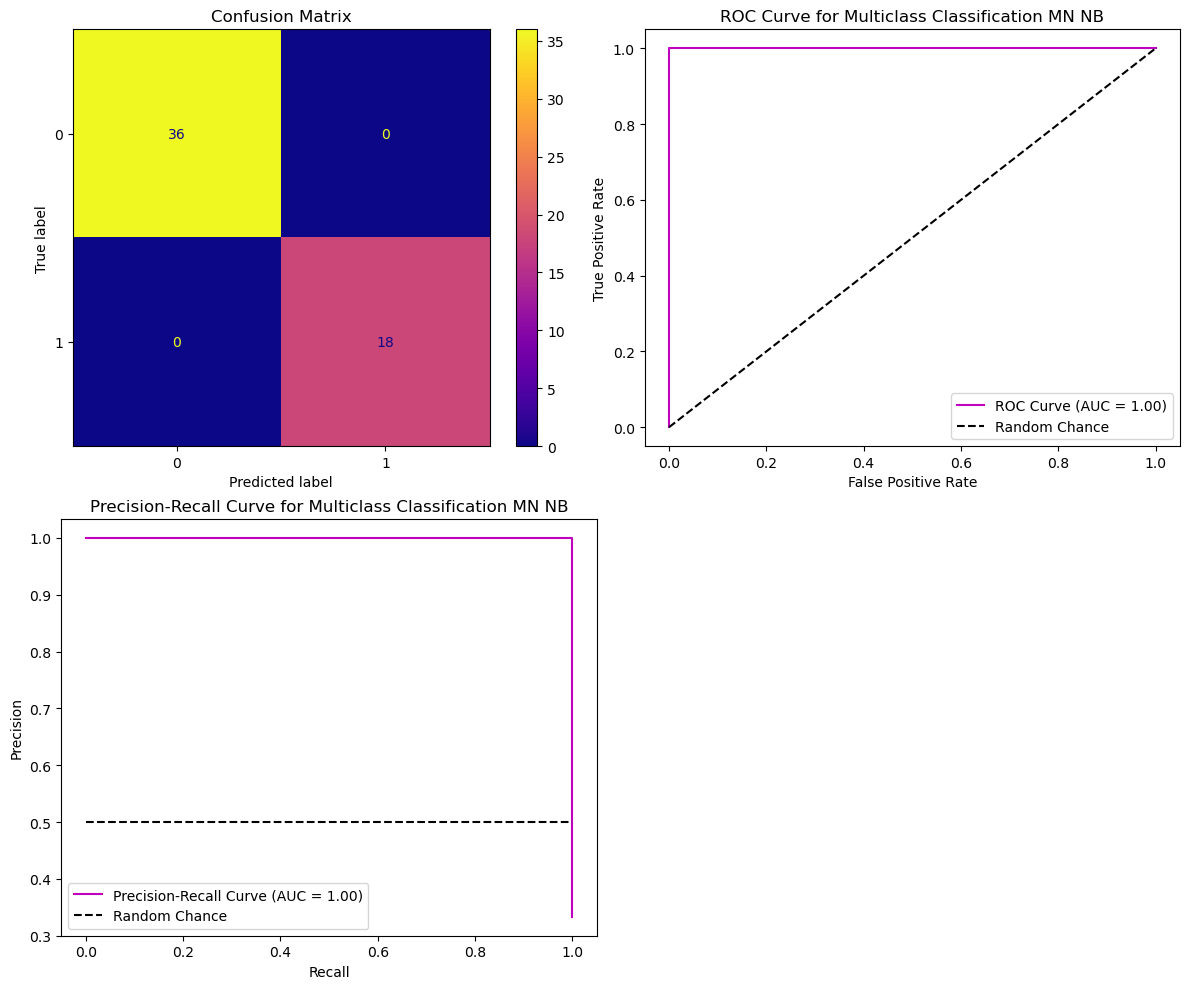

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
axs[0, 1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', c='m')
axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification MN NB')
axs[0, 1].legend()

# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
axs[1, 0].plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', c='m')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification MN NB')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('mn_nb_health_park.jpg')
plt.show()


## Logistic Regression

In [59]:
lr = LogisticRegression(max_iter = 1000, random_state=23)
lr.fit(X_train_over, y_train_over)
y_pred_lr = lr.predict(X_test)

In [60]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
np.round(accuracy_lr, decimals=4)

1.0

In [61]:
y_prob_lr = lr.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob_lr[1]

array([0.99214885, 0.00785115])

In [62]:
y_test_array = np.array(y_test)
y_test_array

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

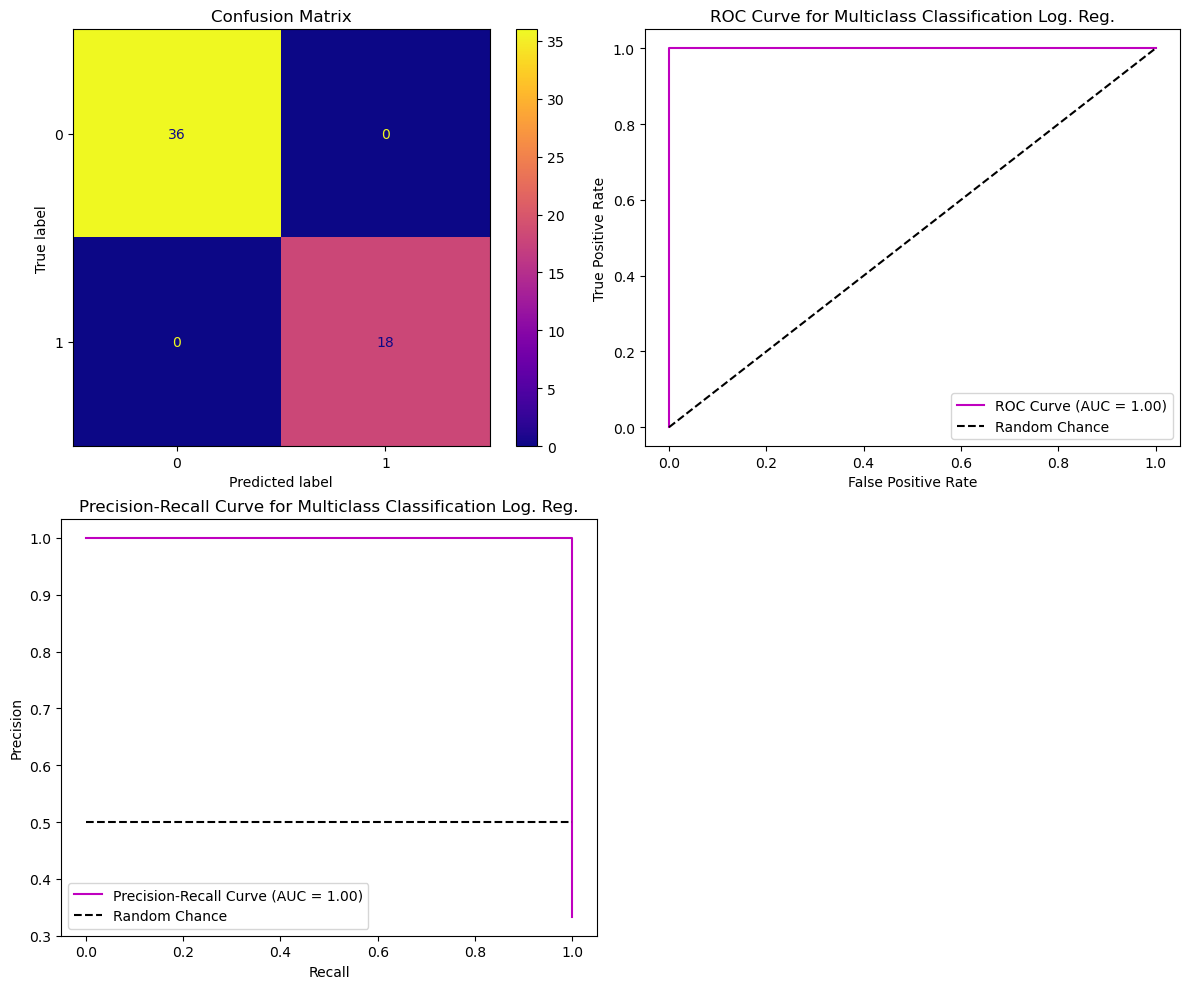

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr[:, 1])
roc_auc = auc(fpr, tpr)
axs[0, 1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', c='m')
axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification Log. Reg.')
axs[0, 1].legend()

# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr[:, 1])
pr_auc = auc(recall, precision)
axs[1, 0].plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', c='m')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification Log. Reg.')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('log_reg_health_park_mnnb.jpg')
plt.show()
